<a href="https://colab.research.google.com/github/lerskkk/Diplom/blob/main/ESRGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESRGAN

In [ ]:
!pip install huggingface_hub==0.20.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.30.2
    Uninstalling huggingface-hub-0.30.2:
      Successfully uninstalled huggingface-hub-0.30.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
accelerate 1.5.2 requires huggingface-hub>=0.21.0, but you have huggingface-hub 0.20.2 which is incompatible.
diffusers 0.32.2 requires huggingface-hub>=0.23.2, but you have huggingface-hub 0.20.2 which is incompatible.
peft 0.14.0 requires huggingface-hub>=0.25.0, but you have huggingface-hub 0.20.2 which is incompatible.
transformers 4.51.3 requires huggingface-hub<1.0,>=0.30.0, but you have huggingface-hub 0.20.2 which is incompatible.


In [ ]:
!pip install git+https://github.com/sberbank-ai/Real-ESRGAN.git

  Cloning https://github.com/sberbank-ai/Real-ESRGAN.git to /tmp/pip-req-build-c7wf3i6j
  Running command git clone --filter=blob:none --quiet https://github.com/sberbank-ai/Real-ESRGAN.git /tmp/pip-req-build-c7wf3i6j
  Resolved https://github.com/sberbank-ai/Real-ESRGAN.git to commit 362a0316878f41dbdfbb23657b450c3353de5acf
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0

In [ ]:
import torch
from PIL import Image
import numpy as np
from RealESRGAN import RealESRGAN

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RealESRGAN(device, scale=4)
model.load_weights('weights/RealESRGAN_x4.pth', download=True)

/usr/local/lib/python3.11/dist-packages/RealESRGAN/model.py:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast()
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:655: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


RealESRGAN_x4.pth:   0%|          | 0.00/67.0M [00:00<?, ?B/s]

Weights downloaded to: weights/RealESRGAN_x4.pth


Трещиноватость

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Изображения/ESRGAN/AUG_ESRGAN/cracked"

In [ ]:
all_orig_imgs = []
all_lr_imgs = []
for i in range(389):
  img = Image.open(DATA_PATH + f"/cracked{i}.png").convert("RGB")

  orig_img = img.resize((256, 256)) #оригинальные изображения приводяться к размеру 256,256
  all_orig_imgs.append(orig_img)

  #lr_img = img.resize((64, 64))
  #all_lr_imgs.append(lr_img) #изображения для работы к 64,64

KeyboardInterrupt: 

In [ ]:
all_lr_imgs[1]

In [ ]:
device

device(type='cuda')

In [ ]:
all_sr_imgs = []
for img in all_orig_imgs: #изображения к высокому разрешению
  sr_image = model.predict(img)
  all_sr_imgs.append(sr_image)
  # save image
  #upscaled_image.save("ldm_generated_image.png")

In [ ]:
all_orig_imgs[55]

In [ ]:
all_sr_imgs[55]

In [ ]:
import os

output_folder = "/content/drive/MyDrive/Изображения/ESRGAN/cracked_aug_x2"

for i, all_sr_imgs in enumerate(all_sr_imgs):
    output_path = os.path.join(output_folder, f"cracked{i}.png")
    all_sr_imgs.save(output_path)

ЭМИС

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Изображения/img_all_sort/enzyme"

In [ ]:
all_orig_imgs = []
all_lr_imgs = []
for i in range(335):
  img = Image.open(DATA_PATH + f"/enzyme{i}.png").convert("RGB")

  orig_img = img.resize((256, 256)) #оригинальные изображения приводяться к размеру 256,256
  all_orig_imgs.append(orig_img)

  lr_img = img.resize((64, 64))
  all_lr_imgs.append(lr_img) #изображения для работы к 64,64

In [ ]:
all_sr_imgs = []
for img in all_lr_imgs: #изображения к высокому разрешению
  sr_image = model.predict(img)
  all_sr_imgs.append(sr_image)
  # save image
  #upscaled_image.save("ldm_generated_image.png")

In [ ]:
import os

output_folder = "/content/drive/MyDrive/Изображения/ESRGAN/enzyme"

for i, all_sr_imgs in enumerate(all_sr_imgs):
    output_path = os.path.join(output_folder, f"enzyme{i}.png")
    all_sr_imgs.save(output_path)

Здоровые

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Изображения/img_all_sort/healthy"

In [ ]:
all_orig_imgs = []
all_lr_imgs = []
for i in range(164):
  img = Image.open(DATA_PATH + f"/healthy{i}.png").convert("RGB")

  lr_img = img.resize((64, 64))
  all_lr_imgs.append(lr_img) #изображения для работы к 64,64

In [ ]:
all_sr_imgs = []
for img in all_lr_imgs: #изображения к высокому разрешению
  sr_image = model.predict(img)
  all_sr_imgs.append(sr_image)
  # save image
  #upscaled_image.save("ldm_generated_image.png")

In [ ]:
import os

output_folder = "/content/drive/MyDrive/Изображения/ESRGAN/healthy"

for i, all_sr_imgs in enumerate(all_sr_imgs):
    output_path = os.path.join(output_folder, f"healthy{i}.png")
    all_sr_imgs.save(output_path)

# Aug


In [ ]:
import os
import random
from PIL import Image
from google.colab import drive
import numpy as np

In [ ]:
def rotate_image_with_background_fill(img, angle):
    # Открываем изображение
    original_image = img

    # Получаем размеры оригинального изображения
    width, height = original_image.size

    # Вычисляем размеры нового изображения после поворота
    new_width = int(abs(width * np.cos(np.radians(angle))) + abs(height * np.sin(np.radians(angle))))
    new_height = int(abs(height * np.cos(np.radians(angle))) + abs(width * np.sin(np.radians(angle))))

    # Создаем новое изображение с фоном того же цвета, что и исходное изображение
    background_color = original_image.getpixel((0, 0))  # Получаем цвет пикселя в левом верхнем углу
    new_image = Image.new("L", (new_width, new_height), background_color)

    # Поворачиваем оригинальное изображение
    rotated_image = original_image.rotate(angle, expand=True)

    # Вычисляем координаты для центрирования оригинального изображения в новом
    x_offset = (new_width - rotated_image.width) // 2
    y_offset = (new_height - rotated_image.height) // 2

    # Вставляем повёрнутое изображение в новое изображение
    new_image.paste(rotated_image, (x_offset, y_offset), rotated_image)
    new_image = new_image.resize((255,255))

    return new_image

In [ ]:
def rotate_random_angle(input_folder, output_folder):

    # Перебираем все файлы во входной папке
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            try:
                # Открываем изображение
                img_path = os.path.join(input_folder, filename)
                img = Image.open(img_path)
                img = img.convert("L")

                # Генерируем случайный угол поворота (от -180 до 180 градусов)
                angle = random.uniform(110, 220)

                # Поворачиваем изображение
                rotated_img =  rotate_image_with_background_fill(img, angle)

                # Сохраняем результат
                output_path = os.path.join(output_folder, f"rotated2_{filename}")
                rotated_img.save(output_path)

                #print(f"Обработано: {filename} -> повернуто на {angle:.2f}°")

            except Exception as e:
                print(f"Ошибка при обработке {filename}: {e}")


In [ ]:
# Указываем пути к папкам
input_folder = '/content/drive/MyDrive/Изображения/ESRGAN/healthy'  # Папка с исходными изображениями
output_folder = '/content/drive/MyDrive/Изображения/ESRGAN/AUG_ESRGAN/healthy'  # Папка для сохранения

# Вызываем функцию
rotate_random_angle(input_folder, output_folder)

In [ ]:
# Указываем пути к папкам
input_folder = '/content/drive/MyDrive/Изображения/ESRGAN/cracked'  # Папка с исходными изображениями
output_folder = '/content/drive/MyDrive/Изображения/ESRGAN/AUG_ESRGAN/cracked'  # Папка для сохранения

# Вызываем функцию
rotate_random_angle(input_folder, output_folder)

In [ ]:
# Указываем пути к папкам
input_folder = '/content/drive/MyDrive/Изображения/ESRGAN/enzyme'  # Папка с исходными изображениями
output_folder = '/content/drive/MyDrive/Изображения/ESRGAN/AUG_ESRGAN/enzyme'  # Папка для сохранения

# Вызываем функцию
rotate_random_angle(input_folder, output_folder)

In [ ]:
import shutil

def copy_images(source_folder, target_folder):
    """
    Копирует все изображения из source_folder в target_folder
    Поддерживаемые форматы: .jpg, .jpeg, .png, .bmp, .gif
    """
    # Подсчет скопированных файлов
    copied_files = 0

    # Перебираем файлы в исходной папке
    for filename in os.listdir(source_folder):
        # Проверяем расширение файла
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            try:
                # Формируем полные пути
                src_path = os.path.join(source_folder, filename)
                dst_path = os.path.join(target_folder, filename)

                # Копируем файл
                shutil.copy2(src_path, dst_path)
                copied_files += 1
                #print(f"Скопировано: {filename}")

            except Exception as e:
                print(f"Ошибка при копировании {filename}: {e}")

    print(f"\nГотово! Скопировано файлов: {copied_files}")


In [ ]:
# Укажите ваши пути
source_folder = '/content/drive/MyDrive/Изображения/ESRGAN/cracked'  # Замените на ваш путь
target_folder = '/content/drive/MyDrive/Изображения/ESRGAN/AUG_ESRGAN/cracked'    # Замените на ваш путь

# Вызываем функцию
copy_images(source_folder, target_folder)

Скопировано: cracked108.png
Скопировано: cracked107.png
Скопировано: cracked105.png
Скопировано: cracked106.png
Скопировано: cracked102.png
Скопировано: cracked103.png
Скопировано: cracked100.png
Скопировано: cracked101.png
Скопировано: cracked104.png
Скопировано: cracked10.png
Скопировано: cracked1.png
Скопировано: cracked0.png
Скопировано: cracked11.png
Скопировано: cracked110.png
Скопировано: cracked109.png
Скопировано: cracked111.png
Скопировано: cracked115.png
Скопировано: cracked116.png
Скопировано: cracked146.png
Скопировано: cracked15.png
Скопировано: cracked142.png
Скопировано: cracked144.png
Скопировано: cracked143.png
Скопировано: cracked149.png
Скопировано: cracked141.png
Скопировано: cracked140.png
Скопировано: cracked145.png
Скопировано: cracked136.png
Скопировано: cracked139.png
Скопировано: cracked137.png
Скопировано: cracked14.png
Скопировано: cracked135.png
Скопировано: cracked134.png
Скопировано: cracked133.png
Скопировано: cracked132.png
Скопировано: cracked138.png


In [ ]:
# Укажите ваши пути
source_folder = '/content/drive/MyDrive/Изображения/ESRGAN/enzyme'  # Замените на ваш путь
target_folder = '/content/drive/MyDrive/Изображения/ESRGAN/AUG_ESRGAN/enzyme'    # Замените на ваш путь

# Вызываем функцию
copy_images(source_folder, target_folder)


Готово! Скопировано файлов: 318


In [ ]:
# Укажите ваши пути
source_folder = '/content/drive/MyDrive/Изображения/ESRGAN/cracked'  # Замените на ваш путь
target_folder = '/content/drive/MyDrive/Изображения/ESRGAN/AUG_ESRGAN/cracked'    # Замените на ваш путь

# Вызываем функцию
copy_images(source_folder, target_folder)

# Обучение

In [ ]:
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
data_dir ="/content/drive/MyDrive/Изображения/ESRGAN/AUG_ESRGAN"

img_height, img_width = 224, 224
batch_size = 16
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

class_names = train_ds.class_names
class_names

Found 3277 files belonging to 3 classes.
Using 2622 files for training.
Found 3277 files belonging to 3 classes.
Using 655 files for validation.


['cracked', 'enzyme', 'healthy']

#ResNet50

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

resnet_model.summary()
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=[keras.metrics.AUC()])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_7 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_8 (ModuleWr  (None, 3)                 1539      
 apper)                                                          
                                                                 
Total params: 24638339 (93.99 MB)
Trainable params: 1050627 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
________

accuracy

In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
164/164 [==============================] - 399s 2s/step - loss: 0.2807 - accuracy: 0.8993 - val_loss: 0.1553 - val_accuracy: 0.9374
Epoch 2/10
164/164 [==============================] - 385s 2s/step - loss: 0.1136 - accuracy: 0.9565 - val_loss: 0.1113 - val_accuracy: 0.9618
Epoch 3/10
164/164 [==============================] - 383s 2s/step - loss: 0.0937 - accuracy: 0.9619 - val_loss: 0.1150 - val_accuracy: 0.9557
Epoch 4/10
164/164 [==============================] - 401s 2s/step - loss: 0.0845 - accuracy: 0.9641 - val_loss: 0.1763 - val_accuracy: 0.9389
Epoch 5/10
164/164 [==============================] - 398s 2s/step - loss: 0.0872 - accuracy: 0.9649 - val_loss: 0.1288 - val_accuracy: 0.9496
Epoch 6/10
164/164 [==============================] - 386s 2s/step - loss: 0.0810 - accuracy: 0.9687 - val_loss: 0.1623 - val_accuracy: 0.9344
Epoch 7/10
164/164 [==============================] - 394s 2s/step - loss: 0.0620 - accuracy: 0.9752 - val_loss: 0.1135 - val_accuracy: 0.9603

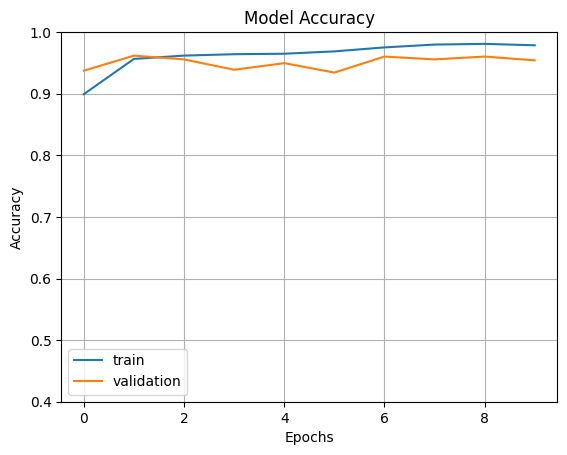

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

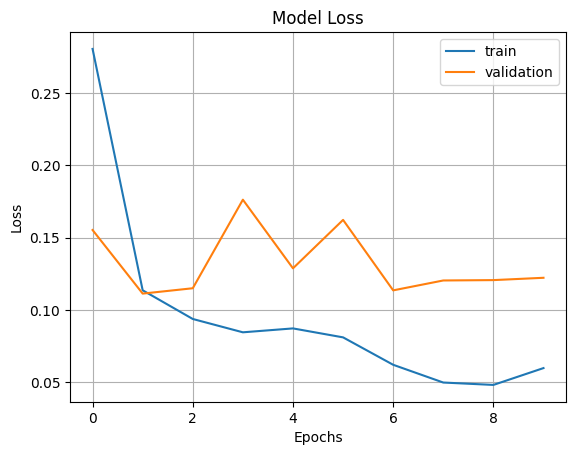

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

recall

Epoch 1/5
164/164 [==============================] - 596s 4s/step - loss: 0.2521 - recall: 0.9050 - val_loss: 0.2867 - val_recall: 0.8977
Epoch 2/5
164/164 [==============================] - 558s 3s/step - loss: 0.1200 - recall: 0.9531 - val_loss: 0.1222 - val_recall: 0.9481
Epoch 3/5
164/164 [==============================] - 563s 3s/step - loss: 0.0963 - recall: 0.9565 - val_loss: 0.1211 - val_recall: 0.9496
Epoch 4/5
164/164 [==============================] - 548s 3s/step - loss: 0.0981 - recall: 0.9607 - val_loss: 0.1380 - val_recall: 0.9450
Epoch 5/5
164/164 [==============================] - 548s 3s/step - loss: 0.0762 - recall: 0.9676 - val_loss: 0.1844 - val_recall: 0.9405


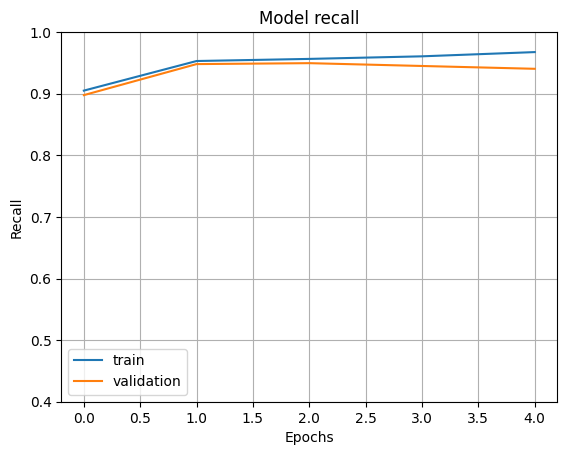

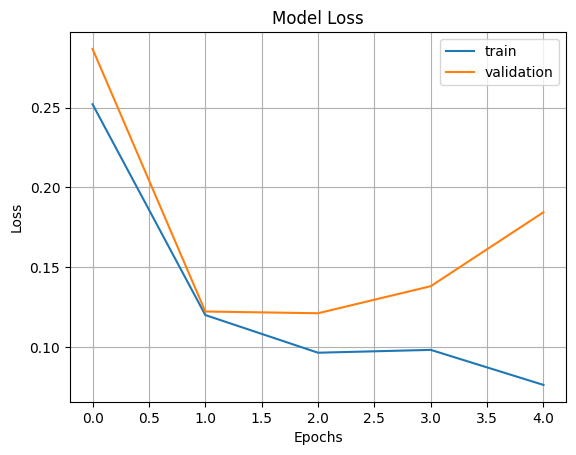

In [ ]:
#recall keras.metrics.Recall()
epochs=5
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

fig1 = plt.gcf()
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
#auc keras.metrics.AUC()
epochs=5
history =  resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

fig1 = plt.gcf()
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('AUC')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Epoch 1/5
164/164 [==============================] - 553s 3s/step - loss: 0.3230 - auc: 0.9762 - val_loss: 0.2147 - val_auc: 0.9879
Epoch 2/5
164/164 [==============================] - 550s 3s/step - loss: 0.1233 - auc: 0.9951 - val_loss: 0.1225 - val_auc: 0.9955
Epoch 3/5
164/164 [==============================] - 547s 3s/step - loss: 0.0938 - auc: 0.9973 - val_loss: 0.1061 - val_auc: 0.9968
Epoch 4/5
 11/164 [=>............................] - ETA: 6:52 - loss: 0.0978 - auc: 0.9974

KeyboardInterrupt: 

# VGG16

In [ ]:
resnet_model_VGG16 = Sequential()

pretrained_model= tf.keras.applications.VGG16(
                   include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model_VGG16.add(pretrained_model)
resnet_model_VGG16.add(Flatten())
resnet_model_VGG16.add(Dense(128, activation='relu'))
resnet_model_VGG16.add(Dense(3, activation='softmax'))

resnet_model_VGG16.summary()
resnet_model_VGG16.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 module_wrapper (ModuleWrap  (None, 512)               0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 128)               65664     
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 3)                 387       
 apper)                                                          
                                                                 
Total params: 14780739 (56.38 MB)
Trainable params: 66051

In [ ]:
epochs=5
history = resnet_model_VGG16.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
164/164 [==============================] - 1658s 10s/step - loss: 0.2793 - accuracy: 0.8955 - val_loss: 0.1847 - val_accuracy: 0.9359
Epoch 2/5
164/164 [==============================] - 1566s 10s/step - loss: 0.1101 - accuracy: 0.9596 - val_loss: 0.1145 - val_accuracy: 0.9588
Epoch 3/5
164/164 [==============================] - 1574s 10s/step - loss: 0.0898 - accuracy: 0.9676 - val_loss: 0.1460 - val_accuracy: 0.9527
Epoch 4/5
164/164 [==============================] - 1598s 10s/step - loss: 0.0726 - accuracy: 0.9699 - val_loss: 0.1425 - val_accuracy: 0.9466
Epoch 5/5
164/164 [==============================] - 1607s 10s/step - loss: 0.0697 - accuracy: 0.9714 - val_loss: 0.1524 - val_accuracy: 0.9511


In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

recall

In [ ]:
#recall keras.metrics.Recall()
epochs=3
history = resnet_model_VGG16.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

fig1 = plt.gcf()
plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Epoch 1/3
164/164 [==============================] - 1768s 11s/step - loss: 0.2985 - recall_1: 0.8749 - val_loss: 0.1443 - val_recall_1: 0.9481
Epoch 2/3
164/164 [==============================] - 1759s 11s/step - loss: 0.1285 - recall_1: 0.9531 - val_loss: 0.1258 - val_recall_1: 0.9557
Epoch 3/3
  9/164 [>.............................] - ETA: 21:29 - loss: 0.1107 - recall_1: 0.9375

AUC

In [ ]:
#auc keras.metrics.AUC()
epochs=3
history =  resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

fig1 = plt.gcf()
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('AUC')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

EfficientNetB0

In [ ]:
efficientnet_model = Sequential()


pretrained_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet',
    pooling='avg'  #Global Average Pooling
)

for layer in pretrained_model.layers:
    layer.trainable = False

efficientnet_model.add(pretrained_model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(128, activation='relu'))
efficientnet_model.add(Dense(3, activation='softmax'))  # 3 класса на выходе

efficientnet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

efficientnet_model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 module_wrapper (ModuleWrap  (None, 1280)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 128)               163968    
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 3)                 387       
 apper)                                                          
                                                         

In [ ]:
epochs=5
history = efficientnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
164/164 [==============================] - 628s 4s/step - loss: 0.1915 - accuracy: 0.9203 - val_loss: 0.1126 - val_accuracy: 0.9542
Epoch 2/5
164/164 [==============================] - 207s 1s/step - loss: 0.1113 - accuracy: 0.9573 - val_loss: 0.1031 - val_accuracy: 0.9573
Epoch 3/5
164/164 [==============================] - 212s 1s/step - loss: 0.1144 - accuracy: 0.9523 - val_loss: 0.0993 - val_accuracy: 0.9557
Epoch 4/5
164/164 [==============================] - 201s 1s/step - loss: 0.0887 - accuracy: 0.9607 - val_loss: 0.1060 - val_accuracy: 0.9603
Epoch 5/5
164/164 [==============================] - 198s 1s/step - loss: 0.0870 - accuracy: 0.9668 - val_loss: 0.1151 - val_accuracy: 0.9481


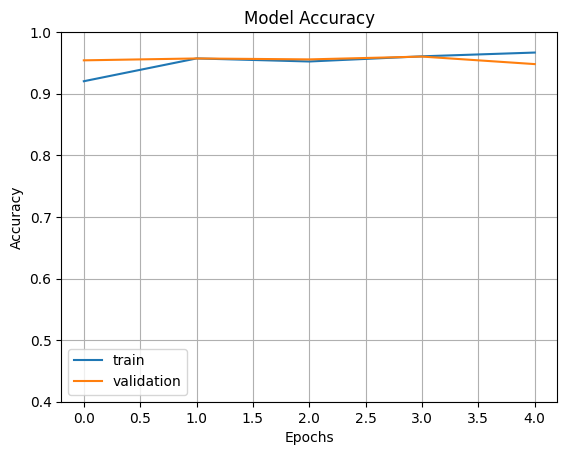

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

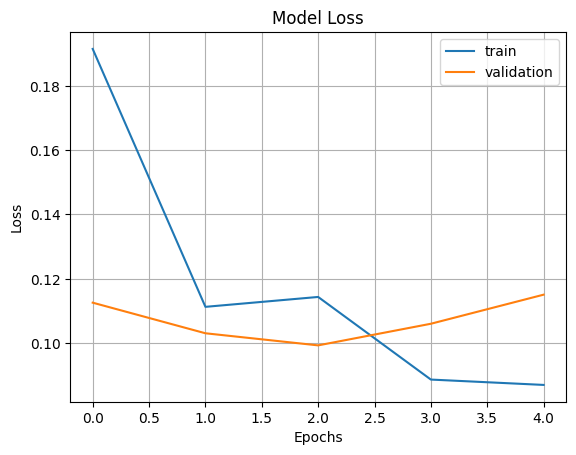

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Новый раздел

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0.920, 0.957, 0.952, 0.961, 0.967, 0.969, 0.971, 0.967, 0.972, 0.970]
z = [0.954, 0.958, 0.956, 0.960, 0.948, 0.950, 0.968, 0.959, 0.960, 0.961]

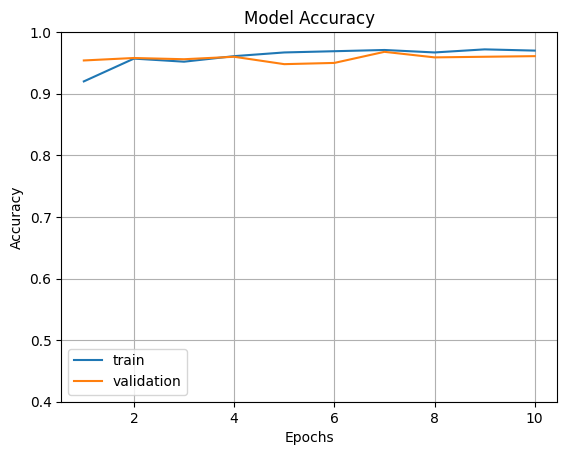

In [ ]:
fig1 = plt.gcf()
plt.plot(x, y)
plt.plot(x, z)
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
y = [0.1915, 0.1113, 0.1144, 0.0887, 0.0870, 0.0865, 0.0832, 0.0859, 0.0821, 0.0812]
z = [0.1126, 0.1031, 0.0993, 0.1060, 0.1151, 0.1104, 0.1081, 0.1055, 0.1024, 0.1063]

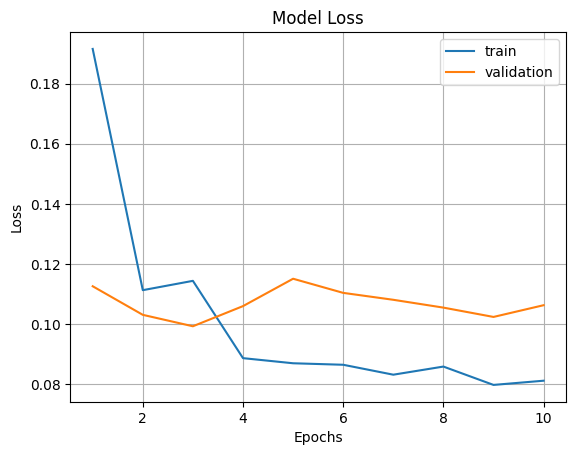

In [ ]:
plt.plot(x, y)
plt.plot(x, z)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()